## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [3]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [4]:
x = torch.tensor([2.0], requires_grad=True)
print(x)
#the requires_grad parameter is used to indicate whether operations involving a tensor should be tracked for the purpose 
#of automatic differentiation, which is crucial for computing gradients during backpropagation.

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [8]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [9]:
y.backward()

In [11]:
x.grad

tensor([12.])

In [12]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [13]:
# your code here
import torch
import math

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

#compute the gradient using the formula of the drivative (the gradient is composed of the derivates of the params of the function)
def sigmoid_gradient(x):
    x = torch.tensor([x], requires_grad=True)
    return sigmoid(x) * (1 - sigmoid(x)) #the derivative of the sigmoid function with respect ot the parameter x


#choose point x=0 and x=1
x1 = torch.tensor([0.0], requires_grad=True)
x2 = torch.tensor([1.0], requires_grad=True)

#apply sigmoid fct on each point
y1 = sigmoid(x1)
y2 = sigmoid(x2)

# Compute the gradients using PyTorch
y1.backward()
y2.backward()

# Print the gradients of PyTorch
print(f"Gradient at x=0: {x1.grad.item()}")  
print(f"Gradient at x=1: {x2.grad.item()}") 

# Compare with our gradient
print(f"Gradient at x=0 (explicit): {sigmoid_gradient(0.).item()}")  
print(f"Gradient at x=1 (explicit): {sigmoid_gradient(1.).item()}")  

Gradient at x=0: 0.25
Gradient at x=1: 0.1966119408607483
Gradient at x=0 (explicit): 0.25
Gradient at x=1 (explicit): 0.1966119259595871


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [19]:
# your code here
import torch

# Define the linear function
def linear(x):
    return x

# Test the gradient at x=0 and x=1
x1 = torch.tensor([0.0], requires_grad=True)
x2 = torch.tensor([1.0], requires_grad=True)

# Compute the gradients using PyTorch
y1 = linear(x1)
y2 = linear(x2)

# Compute the gradients using PyTorch
y1.backward()
y2.backward()

# Print the gradients of PyTorch
print(f"Gradient at x=0: {x1.grad.item()}")  # Expected output: 1.0 (because the derivative of x is 1.0)
print(f"Gradient at x=1: {x2.grad.item()}")  # Expected output: 1.0




Gradient at x=0: 1.0
Gradient at x=1: 1.0


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [25]:
# your code here
import torch

# Define the linear function
def relu(x):
    zero = torch.tensor([0.0], requires_grad=True)
    return torch.max(zero,x)

def relu_gradient(x):
    x = torch.tensor([x], requires_grad=True)
    if x<=0:
        return 0
    else:
        return 1
    
    

# Test the gradient at x=0 and x=1
x1 = torch.tensor([-3.], requires_grad=True)
x2 = torch.tensor([1.0], requires_grad=True)

# Compute the gradients using PyTorch
y1 = relu(x1)
y2 = relu(x2)

y1.backward()
y2.backward()

# Print the gradients 
print(f"Gradient at x=-3: {x1.grad.item()}")  # Expected output: 0.0 (because it returns 0 for values<0, and derivative of 0 )
print(f"Gradient at x=1: {x2.grad.item()}")  # Expected output: 1.0


# Compare with our gradient
print(f"Gradient at x=0 (explicit): {relu_gradient(0.)}")  
print(f"Gradient at x=1 (explicit): {relu_gradient(1.)}")  

Gradient at x=-3: 0.0
Gradient at x=1: 1.0
Gradient at x=0 (explicit): 0
Gradient at x=1 (explicit): 1


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

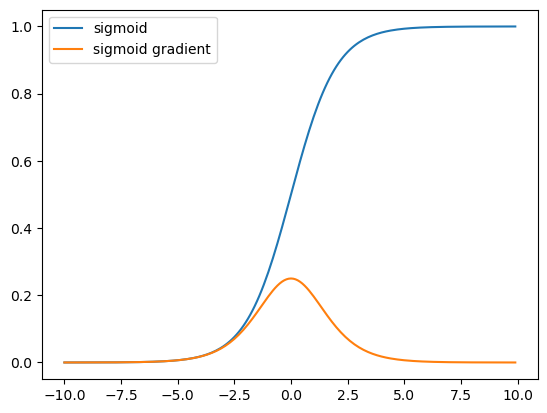

In [26]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Create a range of values from -10 to 10 with 0.1 step size
x = np.arange(-10., 10., 0.1)

# Plot the sigmoid function and its gradient
fig, ax = plt.subplots()
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, sigmoid_gradient(x), label='sigmoid gradient')
ax.legend()
plt.show()


Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

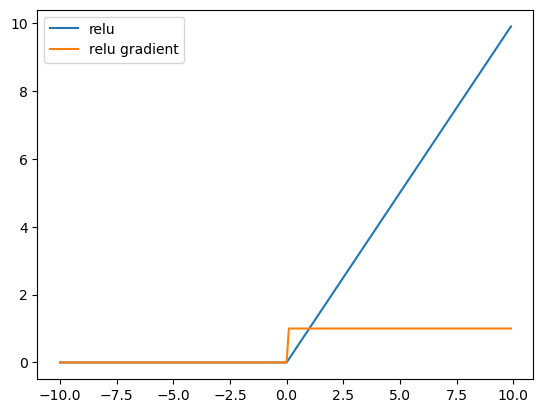

In [34]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return x*(x>0) 


def relu_gradient(x):
    return 1.0 * (x>0)

# Create a range of values from -10 to 10 with 0.1 step size
x = np.arange(-10., 10., 0.1)

# Plot the relu function and its gradient
fig, ax = plt.subplots()
ax.plot(x, relu(x), label='relu')
ax.plot(x, relu_gradient(x), label='relu gradient')
ax.legend()
plt.show()


Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

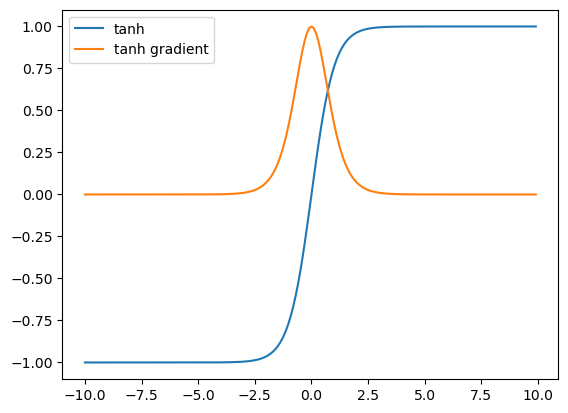

In [35]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)


def tanh_gradient(x):
    return 1-tanh(x)**2

# Create a range of values from -10 to 10 with 0.1 step size
x = np.arange(-10., 10., 0.1)

# Plot the tanh function and its gradient
fig, ax = plt.subplots()
ax.plot(x, tanh(x), label='tanh')
ax.plot(x, tanh_gradient(x), label='tanh gradient')
ax.legend()
plt.show()

Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

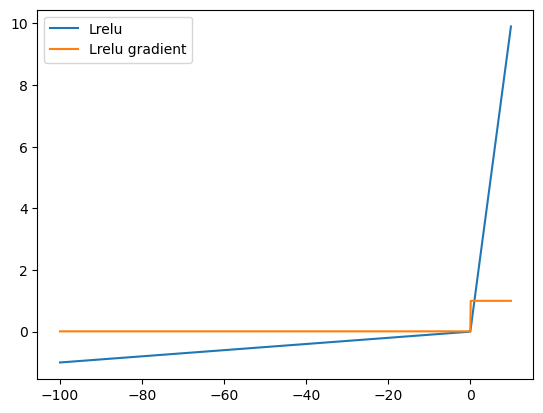

In [36]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def Lrelu(x):
    return np.maximum(x,x*0.01) #because if x>0 e.g. 3, 3*0.01<3 and it will return 3
#but in the case of negative numbers, e.g. -3, -3*0.01>-3 and it will return -0.03, so a small non-zero value for negative inputs


def Lrelu_gradient(x):
    return 1.*(x>0.01*x) + 0.01*(x<=0.01*x)

# Create a range of values from -10 to 10 with 0.1 step size
x = np.arange(-100., 10., 0.1)

# Plot the Lrelu function and its gradient
fig, ax = plt.subplots()
ax.plot(x, Lrelu(x), label='Lrelu')
ax.plot(x, Lrelu_gradient(x), label='Lrelu gradient')
ax.legend()
plt.show()


## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [37]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [38]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.4229], grad_fn=<SigmoidBackward0>)


In [39]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.4309
Epoch [200/1000], Loss: 0.3732
Epoch [300/1000], Loss: 0.3513
Epoch [400/1000], Loss: 0.3402
Epoch [500/1000], Loss: 0.3339
Epoch [600/1000], Loss: 0.3299
Epoch [700/1000], Loss: 0.3273
Epoch [800/1000], Loss: 0.3255
Epoch [900/1000], Loss: 0.3242
Epoch [1000/1000], Loss: 0.3233


Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [44]:
import torch
import torch.optim as optim

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
                
    def forward(self, x):
        x = self.linear(x)
        return x

        
x_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_train = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)
    
criterion = torch.nn.BCEWithLogitsLoss() #aplica sigmoid automat
perceptron = Perceptron(input_size, output_size)

optimizer = optim.SGD(perceptron.parameters(), lr=0.1)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = perceptron(x_train)
    loss = criterion(outputs, y_train)
    #Clears the gradients of all optimized parameters.
    optimizer.zero_grad()
    #Computes gradients of the loss with respect to model parameters using backpropagation.
    loss.backward()
    #Updates the parameters of the model using the gradients computed during the backward pass.
    optimizer.step()
    
    if(epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
with torch.no_grad():
    outputs = perceptron(x_train)
    predicted = (outputs >=0.5).float()
    accuracy = (predicted == y_train).float().mean()
    print(f'Training Accuracy: {accuracy.item():.4f}')

Epoch [100/1000], Loss: 0.5801
Epoch [200/1000], Loss: 0.5501
Epoch [300/1000], Loss: 0.5357
Epoch [400/1000], Loss: 0.5265
Epoch [500/1000], Loss: 0.5192
Epoch [600/1000], Loss: 0.5127
Epoch [700/1000], Loss: 0.5066
Epoch [800/1000], Loss: 0.5008
Epoch [900/1000], Loss: 0.4955
Epoch [1000/1000], Loss: 0.4905
Training Accuracy: 1.0000
